# Analizing Some Aggregated Results of a 100 Runs of the EA

# Preliminaries
## Importing packages

In [2]:
import numpy as np

import seaborn as sns
#sns.set()
#sns.set_style('whitegrid')
#sns.set_context('notebook')
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

from thesis_EAfunc import *
from thesis_visfunc import *

In [3]:
import datetime
time_a = datetime.datetime.now()
print(time_a)

2019-05-03 07:55:09.502719


# Define landscape

In [4]:
#Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

#Known minimum
x_point = -6
y_point = 9

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size = (8.5, 4.25)

#Problem definition
import math
def g(x,y):
    mag = np.sqrt(x**2 + y**2)
    return -(50*np.sinc(mag/np.pi) - mag)

def f(x, y):
    tripsinc = g(x+11, y+9) + g(x-11, y-3) + g(x+6, y-9) - ( g(-6+11,9+9) + g(-6-11,9-3) + g(0,0))
    return tripsinc

#Testing the minimum
print(f(-1,-1), f(-11,-9), f(11,3), f(-6,9))

50.589320445689474 5.146085938881416 6.0759688994616745 0.0


# Running the EA
## Setting parameters

In [5]:
#starting seed
np.random.seed(654321)

In [6]:
#Algorithm parameters
## Number of experiments, and generations per experiment
exp_n = 100
gen_f = 40

## Population size
pop_s = 20

## Parent subpopulation's selection method and size
par_selection = 'Ranking'
par_s = 10

## Progeny subpopulation's and size
prog_s = par_s
### Crossover Method
crossover = 'Simple'
### Mutation method, probability and size
mutation = 'random_co_dis'
mut_p = 0.5
mut_s = 2.5

## New population selection method
population_new='Ranking'

## Running it a 100 times

In [7]:
genera_res, fitness_res = EA_exp(exp_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

# Data analysis
## Top 10 fittest}

In [8]:
query = (fitness_res['generation']==40)
fitness_res[query].sort_values(by=['fitness_mean']).head(10)

,run,generation,fitness_min,fitness_max,fitness_mean,fitness_std
204,4,40.0,-0.026564,-0.026564,-0.026564,0.000000
2090,50,40.0,-0.025900,-0.025900,-0.025900,0.000000
3238,78,40.0,-0.031051,-0.004204,-0.023641,0.011673
2500,60,40.0,-0.024623,-0.022143,-0.023507,0.001266
3607,87,40.0,-0.031099,-0.022401,-0.023271,0.002677
81,1,40.0,-0.030948,-0.014894,-0.020854,0.007747
40,0,40.0,-0.029005,-0.008749,-0.020710,0.007014
860,20,40.0,-0.020938,-0.011565,-0.020469,0.002096
737,17,40.0,-0.018238,-0.018238,-0.018238,0.000000
1680,40,40.0,-0.019046,0.001228,-0.013153,0.009249


## Top 10 least fit

In [9]:
fitness_res[query].sort_values(by=['fitness_mean'], ascending=False).head(10)

,run,generation,fitness_min,fitness_max,fitness_mean,fitness_std
122,2,40.0,32.848481,32.911136,32.865347,0.017423
2787,67,40.0,32.846509,32.875130,32.863768,0.013083
655,15,40.0,32.823664,32.851819,32.845475,0.011628
3812,92,40.0,32.810122,32.846208,32.840842,0.013106
1229,29,40.0,32.821414,32.837546,32.836739,0.003607
409,9,40.0,32.823813,32.830066,32.826972,0.003177
2254,54,40.0,32.810141,32.813784,32.813601,0.000814
2213,53,40.0,32.809390,32.809777,32.809564,0.000198
1434,34,40.0,6.071822,6.404899,6.335051,0.133591
245,5,40.0,6.059270,6.260862,6.246109,0.048677


In [10]:
time_b = datetime.datetime.now()
print(time_b)
print(time_b-time_a)

2019-05-03 07:56:07.244179
0:00:57.741460


# Data visualization
## Agregated results visualization

In [11]:
query = (fitness_res['generation']==40)
type(fitness_res[query]['fitness_mean'])

pandas.core.series.Series

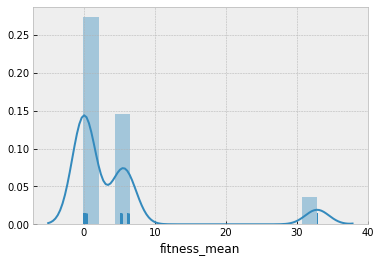

In [12]:
sns.distplot(fitness_res[query]['fitness_mean'],rug=True)

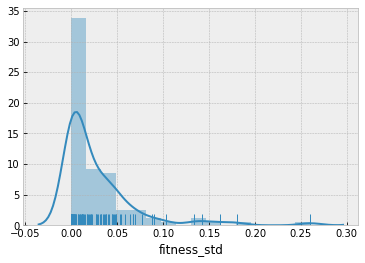

In [13]:
sns.distplot(fitness_res[query]['fitness_std'],rug=True)

## Checking movement of population

In [11]:
#Visualization parameters
grph_steps = 61
a=15
b=-60
ratio_w=1.3
ln=.75


Generation 0


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


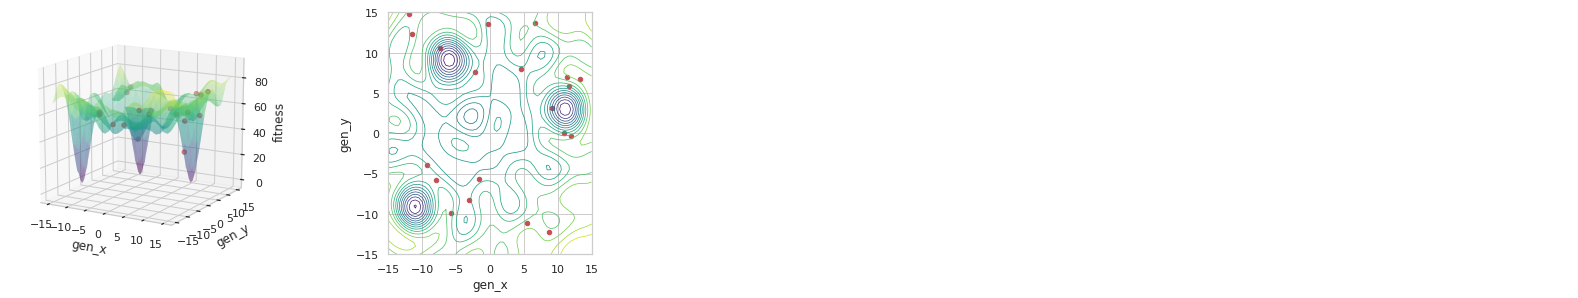

Generation 4


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


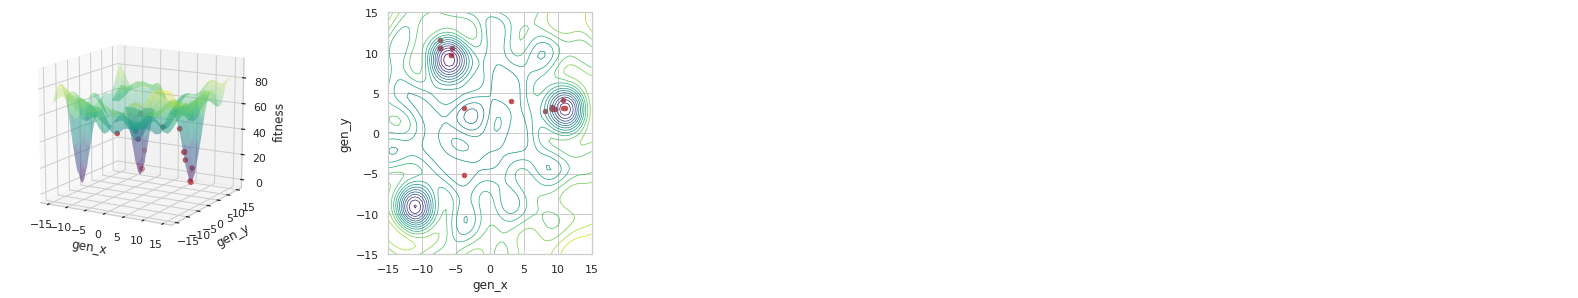

Generation 8


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


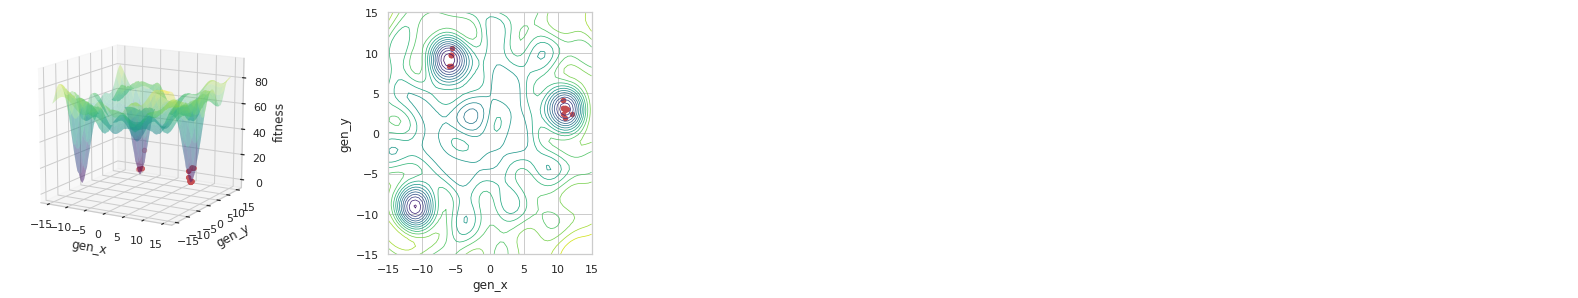

Generation 16


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


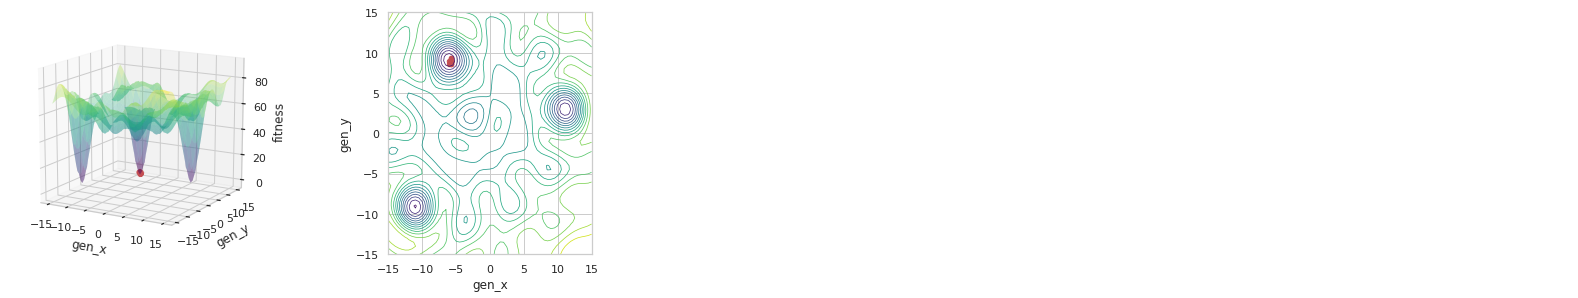

Generation 24


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


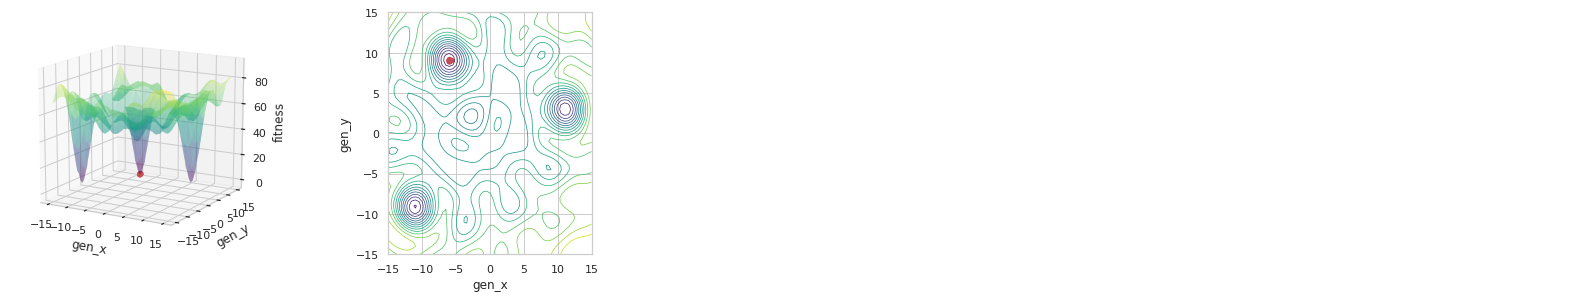

Generation 32


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


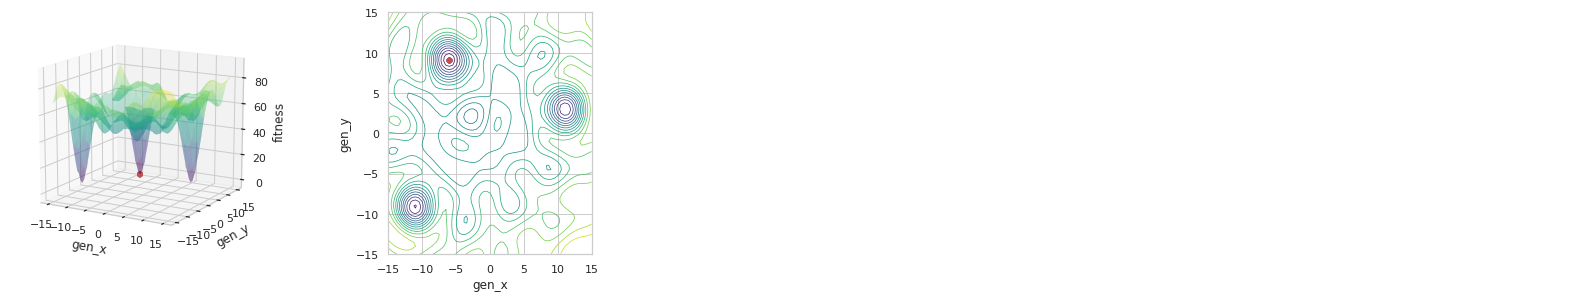

Generation 40


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


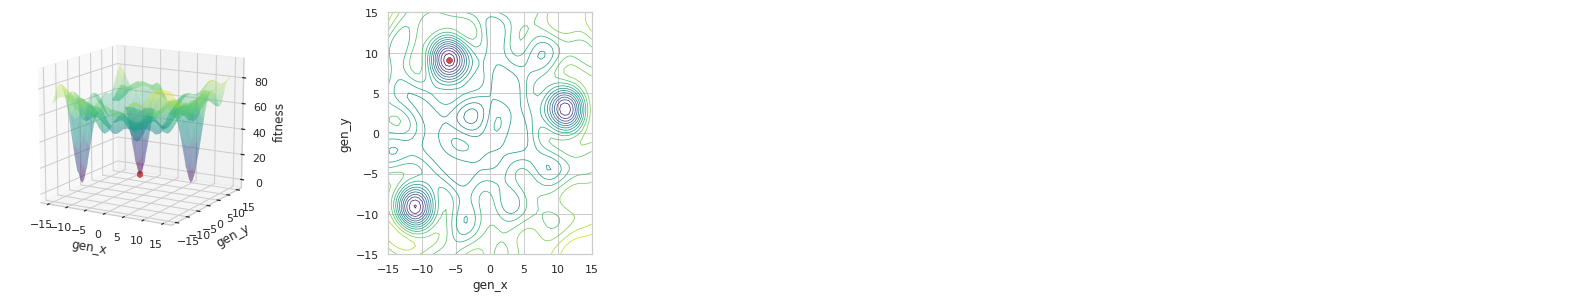

In [14]:
run_s = 4

print('Generation 0')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 0, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 4')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 4, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 8')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 8, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 16')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 16, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 24')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 24, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 32')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 32, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 40')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 40, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

In [13]:
time_c = datetime.datetime.now()
print(time_c)
print(time_c-time_a)

2019-04-30 10:19:59.611908
0:01:14.298805


In [21]:
print(plt.style.available)

['Solarize_Light2', '_classic_test', 'seaborn-pastel', 'ggplot', 'seaborn-dark', 'fast', 'seaborn-muted', 'seaborn-ticks', 'grayscale', 'seaborn-darkgrid', 'seaborn-notebook', 'seaborn', 'fivethirtyeight', 'seaborn-whitegrid', 'seaborn-paper', 'bmh', 'seaborn-white', 'tableau-colorblind10', 'seaborn-dark-palette', 'seaborn-deep', 'classic', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-talk', 'dark_background', 'seaborn-poster']
